In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [27]:
df = pd.read_csv("train.csv")

### Preprocesamiento de Datos

In [28]:
# Vamos a eliminar columnas irrelevantes
columns_to_drop = ['uri', 'track_href', 'analysis_url', 'Unnamed: 0', 'title', 'id', 'Id']
df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,genre,song_name
0,0.896,0.691,1,-7.403,1,0.369,0.01180,0.000,0.0883,0.6650,189.880,audio_features,152398,4,Underground Rap,First Day Out
1,0.432,0.962,2,-5.834,1,0.130,0.00193,0.162,0.6300,0.1240,138.010,audio_features,219085,4,trance,NaN
2,0.686,0.692,0,-5.573,0,0.323,0.48200,0.000,0.1690,0.6490,173.780,audio_features,269357,3,Underground Rap,Funky Ho'$
3,0.441,0.891,7,-2.873,0,0.037,0.01770,0.815,0.1840,0.0353,175.007,audio_features,319851,4,dnb,NaN
4,0.376,0.876,4,-2.695,0,0.101,0.03450,0.000,0.1250,0.2500,202.082,audio_features,222442,4,Dark Trap,Miss U


In [29]:
# Vamos a asegurarnos que solo quedan columnas númericas
df_num = df_cleaned.select_dtypes(include=["float64", "int64"])
df_num.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.896,0.691,1,-7.403,1,0.369,0.01180,0.000,0.0883,0.6650,189.880,152398,4
1,0.432,0.962,2,-5.834,1,0.130,0.00193,0.162,0.6300,0.1240,138.010,219085,4
2,0.686,0.692,0,-5.573,0,0.323,0.48200,0.000,0.1690,0.6490,173.780,269357,3
3,0.441,0.891,7,-2.873,0,0.037,0.01770,0.815,0.1840,0.0353,175.007,319851,4
4,0.376,0.876,4,-2.695,0,0.101,0.03450,0.000,0.1250,0.2500,202.082,222442,4


In [30]:
# Normalizacion de los datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_num)

## Clustering

### a) K-Means

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

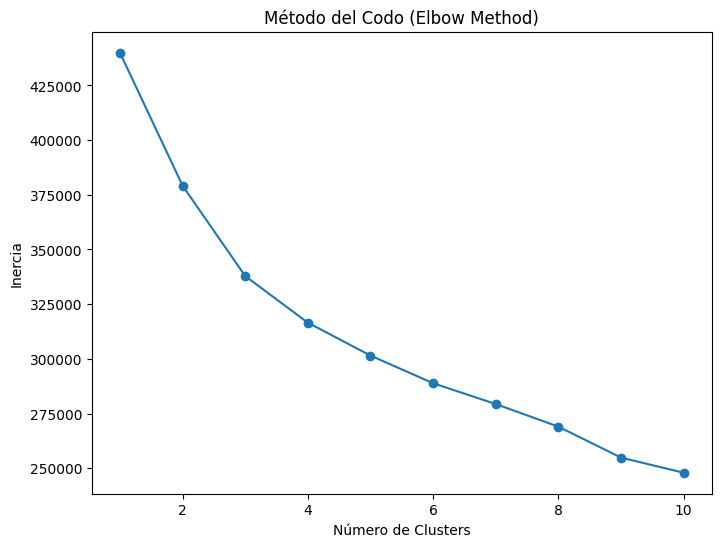

In [32]:
inertia = []

# Encontrar el número óptimo de clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Método del Codo (Elbow Method)")
plt.xlabel("Número de Clusters")
plt.ylabel("Inercia")
plt.show()

Consideramos el codo cuando es 4 el número de clusters. Ajustamos el modelo con el número óptimo.

In [33]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

### b) DBSCAN

In [34]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

In [35]:
print("Número de clusters encontrados por DBSCAN:", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))

Número de clusters encontrados por DBSCAN: 119


Nos han salido 119, es decir, que el rango que hemos puesto para el KMeans podria haber sido mayor.

## Reduccion de Dimensionalidad

### a) PCA

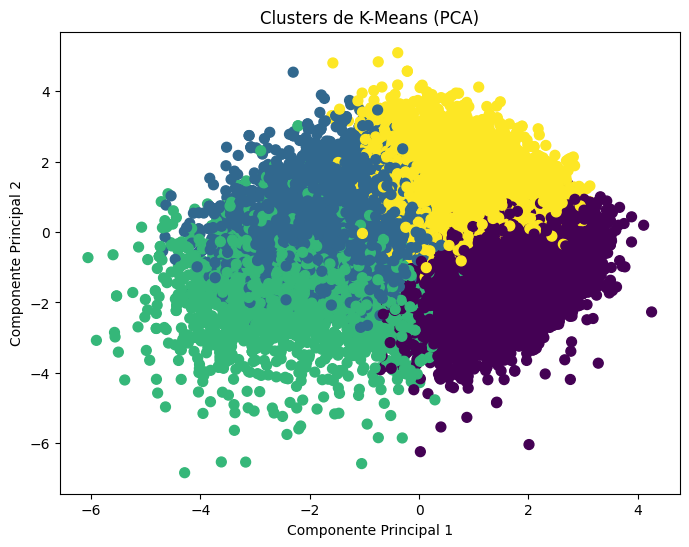

In [36]:
from sklearn.decomposition import PCA

# Reducción de dimensionalidad usando PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Graficar los clusters con los resultados de K-Means
plt.figure(figsize=(8,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("Clusters de K-Means (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

Parece que hay cuatro grupos bastante diferenciados.

### b) TSNE

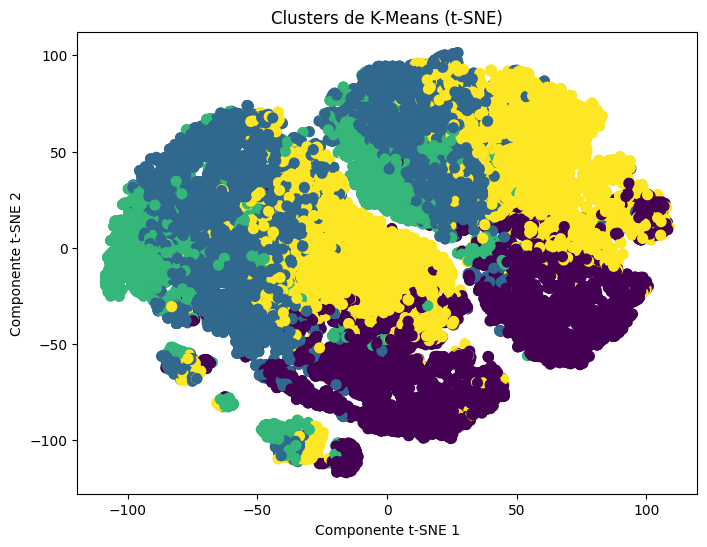

In [37]:
from sklearn.manifold import TSNE

# Reducción de dimensionalidad usando t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)

# Graficar los clusters con t-SNE
plt.figure(figsize=(8,6))
plt.scatter(df_tsne[:, 0], df_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("Clusters de K-Means (t-SNE)")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.show()

Parece que da mejor resultado el PCA ya que se diferencian mejor los grupos.

## Evaluación de los Modelos

In [38]:
from sklearn.metrics import silhouette_score

# Silhouette Score para K-Means
sil_score_kmeans = silhouette_score(df_scaled, kmeans_labels)
print("Silhouette Score (K-Means):", sil_score_kmeans)

# Silhouette Score para DBSCAN
sil_score_dbscan = silhouette_score(df_scaled, dbscan_labels)
print("Silhouette Score (DBSCAN):", sil_score_dbscan)

Silhouette Score (K-Means): 0.13471376213694963
Silhouette Score (DBSCAN): -0.5159725865989779
